In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_wine
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline


In [36]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy.
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


Mean Squared Error (MSE): 0.0124


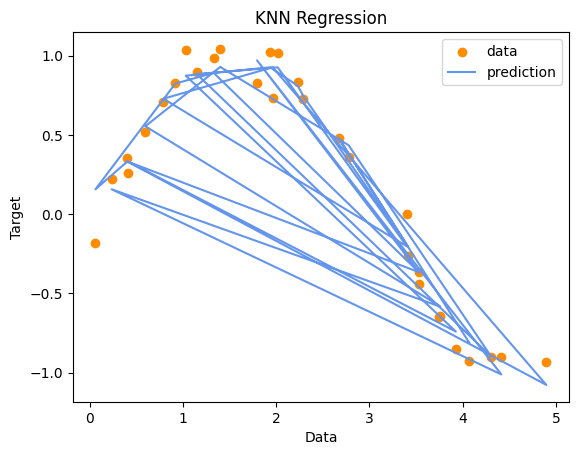

In [5]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
X_reg = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure()
plt.scatter(X_test_reg, y_test_reg, color='darkorange', label='data')
plt.plot(X_test_reg, y_pred_reg, color='cornflowerblue', label='prediction')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [4]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

X_train_dm, X_test_dm, y_train_dm, y_test_dm = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn_dm = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_dm.fit(X_train_dm, y_train_dm)
    y_pred_dm = knn_dm.predict(X_test_dm)
    accuracy_dm = accuracy_score(y_test_dm, y_pred_dm)
    print(f"Accuracy with {metric} distance: {accuracy_dm:.4f}")

Accuracy with euclidean distance: 1.0000
Accuracy with manhattan distance: 1.0000


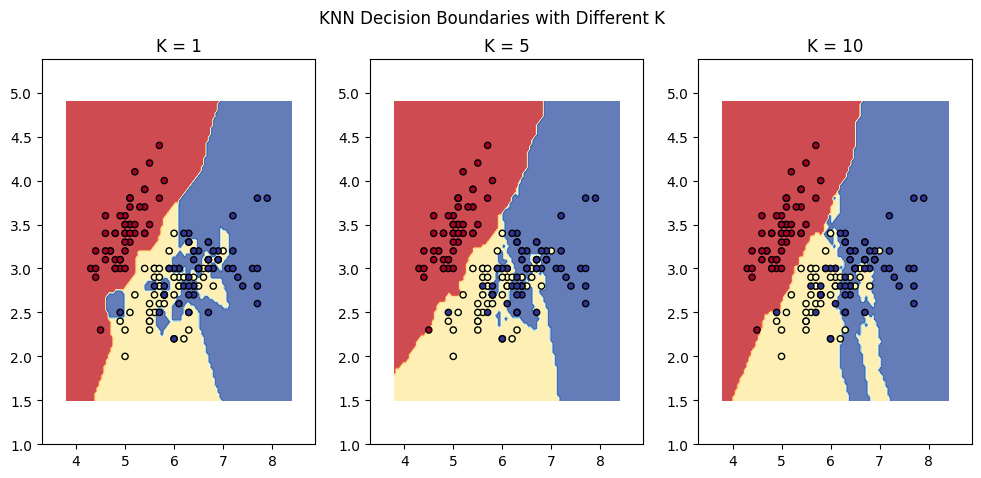

In [7]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries

X_db, y_db = iris.data[:, :2], iris.target
h = .02  # step size in the mesh
x_min, x_max = X_db[:, 0].min() - 1, X_db[:, 0].max() + 1
y_min, y_max = X_db[:, 1].min() - 1, X_db[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(12, 5))
for i, n_neighbors in enumerate([1, 5, 10]):
    plt.subplot(1, 3, i + 1)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_db, y_db)
    DecisionBoundaryDisplay.from_estimator(clf, X_db, cmap=plt.cm.RdYlBu, alpha=0.8, ax=plt.gca(), eps=0.5)
    plt.scatter(X_db[:, 0], X_db[:, 1], c=y_db, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"K = {n_neighbors}")
plt.suptitle("KNN Decision Boundaries with Different K")
plt.show()



In [8]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Unscaled
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train_scaled, y_train_scaled)
y_pred_unscaled = knn_unscaled.predict(X_test_scaled)
accuracy_unscaled = accuracy_score(y_test_scaled, y_pred_unscaled)
print(f"Accuracy (unscaled data): {accuracy_unscaled:.4f}")

# Scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(f"Accuracy (scaled data): {accuracy_scaled:.4f}")



Accuracy (unscaled data): 1.0000
Accuracy (scaled data): 1.0000


In [9]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

X_pca = np.random.rand(100, 4)
pca = PCA(n_components=4)
pca.fit(X_pca)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance_ratio)



Explained variance ratio for each component: [0.34495245 0.25589721 0.21899047 0.18015987]


In [10]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_pca, y_train_pca)
y_pred_no_pca = knn_no_pca.predict(X_test_pca)
accuracy_no_pca = accuracy_score(y_test_pca, y_pred_no_pca)
print(f"Accuracy (without PCA): {accuracy_no_pca:.4f}")

# KNN with PCA (reducing to 2 components)
pca_knn = PCA(n_components=2)
X_train_pca_transformed = pca_knn.fit_transform(X_train_pca)
X_test_pca_transformed = pca_knn.transform(X_test_pca)
knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca_transformed, y_train_pca)
y_pred_with_pca = knn_with_pca.predict(X_test_pca_transformed)
accuracy_with_pca = accuracy_score(y_test_pca, y_pred_with_pca)
print(f"Accuracy (with PCA, 2 components): {accuracy_with_pca:.4f}")



Accuracy (without PCA): 1.0000
Accuracy (with PCA, 2 components): 1.0000


In [11]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

X_grid, y_grid = load_iris(return_X_y=True)
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42)
param_grid = {'n_neighbors': range(1, 11), 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_grid, y_train_grid)
print("Best hyperparameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred_grid = best_knn.predict(X_test_grid)
accuracy_grid = accuracy_score(y_test_grid, y_pred_grid)
print(f"Accuracy with best hyperparameters: {accuracy_grid:.4f}")





Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1}
Accuracy with best hyperparameters: 1.0000


In [12]:
# 29. Train a KNN Classifier and check the number of misclassified samples.

X_mis, y_mis = load_iris(return_X_y=True)
X_train_mis, X_test_mis, y_train_mis, y_test_mis = train_test_split(X_mis, y_mis, test_size=0.3, random_state=42)
knn_mis = KNeighborsClassifier(n_neighbors=3)
knn_mis.fit(X_train_mis, y_train_mis)
y_pred_mis = knn_mis.predict(X_test_mis)
misclassified_samples = np.sum(y_pred_mis != y_test_mis)
print(f"Number of misclassified samples: {misclassified_samples}")

Number of misclassified samples: 0


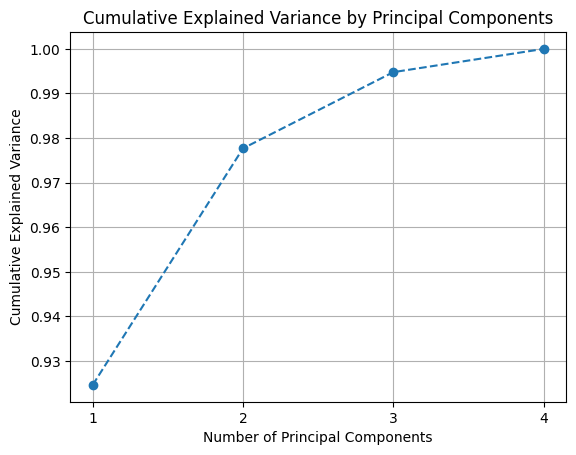

In [13]:
# 30. Train a PCA model and visualize the cumulative explained variance.

X_viz, y_viz = load_iris(return_X_y=True)
pca_viz = PCA(n_components=4)
pca_viz.fit(X_viz)
explained_variance_ratio_viz = pca_viz.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_viz)

plt.figure()
plt.plot(range(1, 5), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

In [15]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

iris = load_iris()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
weights = ['uniform', 'distance']
for weight in weights:
    knn_w = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn_w.fit(X_train_w, y_train_w)
    y_pred_w = knn_w.predict(X_test_w)
    accuracy_w = accuracy_score(y_test_w, y_pred_w)
    print(f"Accuracy with weights='{weight}': {accuracy_w:.4f}")


Accuracy with weights='uniform': 1.0000
Accuracy with weights='distance': 1.0000


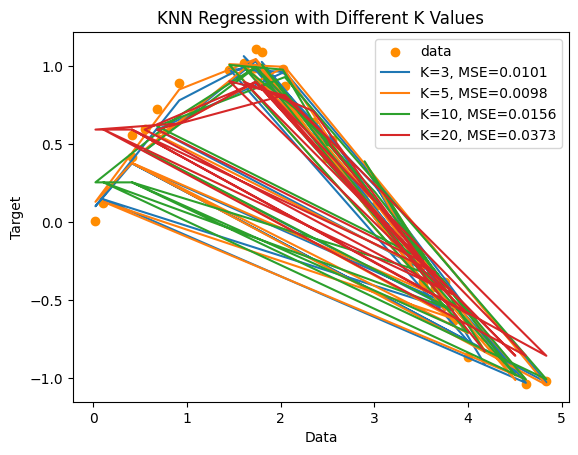

In [16]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance.

X_reg_k = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg_k = np.sin(X_reg_k).ravel() + np.random.normal(0, 0.1, X_reg_k.shape[0])
X_train_reg_k, X_test_reg_k, y_train_reg_k, y_test_reg_k = train_test_split(X_reg_k, y_reg_k, test_size=0.3, random_state=42)
k_values = [3, 5, 10, 20]
plt.figure()
plt.scatter(X_test_reg_k, y_test_reg_k, color='darkorange', label='data')
for k in k_values:
    knn_reg_k = KNeighborsRegressor(n_neighbors=k)
    knn_reg_k.fit(X_train_reg_k, y_train_reg_k)
    y_pred_reg_k = knn_reg_k.predict(X_test_reg_k)
    mse_k = mean_squared_error(y_test_reg_k, y_pred_reg_k)
    plt.plot(X_test_reg_k, y_pred_reg_k, label=f'K={k}, MSE={mse_k:.4f}')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('KNN Regression with Different K Values')
plt.legend()
plt.show()



In [17]:
# 33. Implement KNN Imputation for handling missing values in a dataset.

X_missing = np.array([[1, 2, np.nan], [3, np.nan, 4], [np.nan, 5, 6], [7, 8, 9]])
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)
print("Original data with missing values:\n", X_missing)
print("Data after KNN imputation:\n", X_imputed)


Original data with missing values:
 [[ 1.  2. nan]
 [ 3. nan  4.]
 [nan  5.  6.]
 [ 7.  8.  9.]]
Data after KNN imputation:
 [[1.  2.  5. ]
 [3.  3.5 4. ]
 [2.  5.  6. ]
 [7.  8.  9. ]]


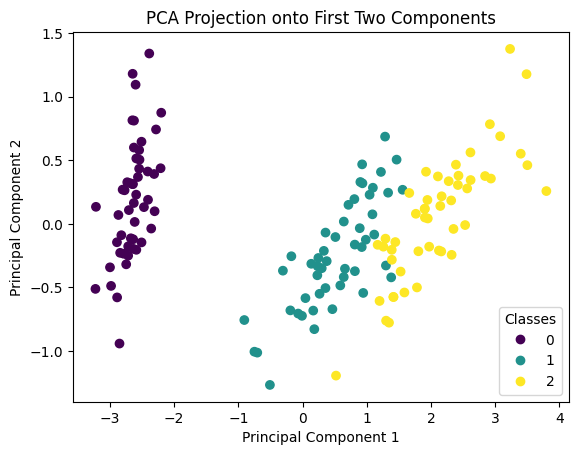

In [18]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components.

iris_pca = load_iris()
X_pca_viz, y_pca_viz = iris_pca.data, iris_pca.target
pca_viz_2 = PCA(n_components=2)
X_pca_transformed_viz = pca_viz_2.fit_transform(X_pca_viz)
plt.figure()
scatter = plt.scatter(X_pca_transformed_viz[:, 0], X_pca_transformed_viz[:, 1], c=y_pca_viz, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection onto First Two Components')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()



In [19]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

X_tree, y_tree = load_iris(return_X_y=True)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)
algorithms = ['kd_tree', 'ball_tree']
for algorithm in algorithms:
    knn_tree = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    knn_tree.fit(X_train_tree, y_train_tree)
    y_pred_tree = knn_tree.predict(X_test_tree)
    accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
    print(f"Accuracy with algorithm='{algorithm}': {accuracy_tree:.4f}")


Accuracy with algorithm='kd_tree': 1.0000
Accuracy with algorithm='ball_tree': 1.0000


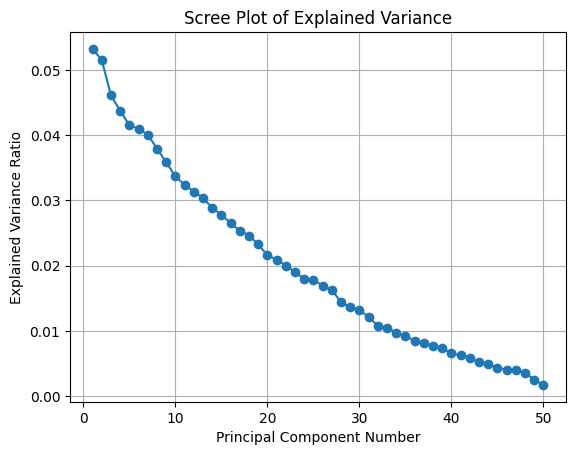

In [20]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

X_high = np.random.rand(100, 50)
pca_high = PCA(n_components=50)
pca_high.fit(X_high)
explained_variance_ratio_high = pca_high.explained_variance_ratio_
plt.figure()
plt.plot(range(1, 51), explained_variance_ratio_high, marker='o', linestyle='-')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [21]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

X_eval, y_eval = load_iris(return_X_y=True)
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_eval, y_eval, test_size=0.3, random_state=42)
knn_eval = KNeighborsClassifier(n_neighbors=5)
knn_eval.fit(X_train_eval, y_train_eval)
y_pred_eval = knn_eval.predict(X_test_eval)
report = classification_report(y_test_eval, y_pred_eval)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy.

X_pca_acc, y_pca_acc = load_iris(return_X_y=True)
X_train_pca_acc, X_test_pca_acc, y_train_pca_acc, y_test_pca_acc = train_test_split(X_pca_acc, y_pca_acc, test_size=0.3, random_state=42)
scaler_pca = StandardScaler()
X_train_pca_acc_scaled = scaler_pca.fit_transform(X_train_pca_acc)
X_test_pca_acc_scaled = scaler_pca.transform(X_test_pca_acc)
components_range = range(1, 5)
for n_components in components_range:
    pca_acc = PCA(n_components=n_components)
    X_train_transformed_acc = pca_acc.fit_transform(X_train_pca_acc_scaled)
    X_test_transformed_acc = pca_acc.transform(X_test_pca_acc_scaled)
    knn_pca_acc = KNeighborsClassifier(n_neighbors=5)
    knn_pca_acc.fit(X_train_transformed_acc, y_train_pca_acc)
    y_pred_pca_acc = knn_pca_acc.predict(X_test_transformed_acc)
    accuracy_pca_acc = accuracy_score(y_test_pca_acc, y_pred_pca_acc)
    print(f"Accuracy with PCA (n_components={n_components}): {accuracy_pca_acc:.4f}")


Accuracy with PCA (n_components=1): 0.9556
Accuracy with PCA (n_components=2): 0.9556
Accuracy with PCA (n_components=3): 1.0000
Accuracy with PCA (n_components=4): 1.0000


In [23]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy.

X_leaf, y_leaf = load_iris(return_X_y=True)
X_train_leaf, X_test_leaf, y_train_leaf, y_test_leaf = train_test_split(X_leaf, y_leaf, test_size=0.3, random_state=42)
leaf_sizes = [1, 10, 30, 50]
for leaf_size in leaf_sizes:
    knn_leaf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn_leaf.fit(X_train_leaf, y_train_leaf)
    y_pred_leaf = knn_leaf.predict(X_test_leaf)
    accuracy_leaf = accuracy_score(y_test_leaf, y_pred_leaf)
    print(f"Accuracy with leaf_size={leaf_size}: {accuracy_leaf:.4f}")


Accuracy with leaf_size=1: 1.0000
Accuracy with leaf_size=10: 1.0000
Accuracy with leaf_size=30: 1.0000
Accuracy with leaf_size=50: 1.0000


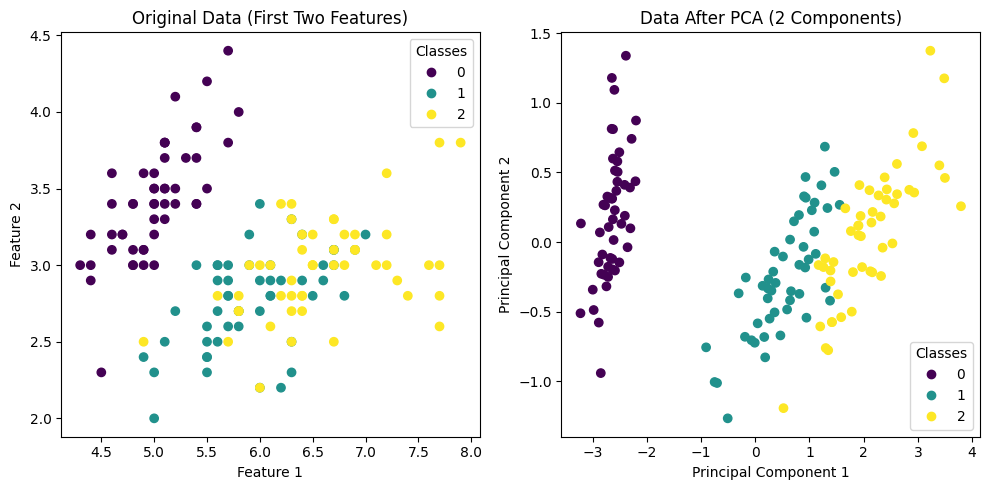

In [24]:
# 40. Train a PCA model and visualize how data points are transformed before and after PCA.

iris_transform = load_iris()
X_orig = iris_transform.data
y_orig = iris_transform.target
pca_transform = PCA(n_components=2)
X_transformed = pca_transform.fit_transform(X_orig)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
scatter_orig = plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data (First Two Features)')
plt.legend(*scatter_orig.legend_elements(), title="Classes")

plt.subplot(1, 2, 2)
scatter_transformed = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_orig, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA (2 Components)')
plt.legend(*scatter_transformed.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()


In [25]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)
scaler_wine = StandardScaler()
X_train_wine_scaled = scaler_wine.fit_transform(X_train_wine)
X_test_wine_scaled = scaler_wine.transform(X_test_wine)
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_wine_scaled, y_train_wine)
y_pred_wine = knn_wine.predict(X_test_wine_scaled)
report_wine = classification_report(y_test_wine, y_pred_wine)
print("Classification Report (Wine Dataset):\n", report_wine)


Classification Report (Wine Dataset):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [26]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

X_reg_dist = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg_dist = np.sin(X_reg_dist).ravel() + np.random.normal(0, 0.1, X_reg_dist.shape[0])
X_train_reg_dist, X_test_reg_dist, y_train_reg_dist, y_test_reg_dist = train_test_split(X_reg_dist, y_reg_dist, test_size=0.3, random_state=42)
metrics_reg = ['euclidean', 'manhattan']
for metric_reg in metrics_reg:
    knn_reg_dist = KNeighborsRegressor(n_neighbors=5, metric=metric_reg)
    knn_reg_dist.fit(X_train_reg_dist, y_train_reg_dist)
    y_pred_reg_dist = knn_reg_dist.predict(X_test_reg_dist)
    mse_reg_dist = mean_squared_error(y_test_reg_dist, y_pred_reg_dist)
    print(f"MSE with metric='{metric_reg}': {mse_reg_dist:.4f}")


MSE with metric='euclidean': 0.0088
MSE with metric='manhattan': 0.0088


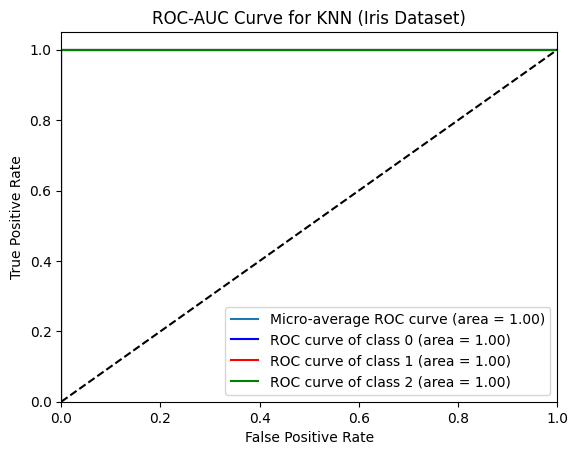

In [27]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score.

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

iris_roc = load_iris()
X_roc, y_roc = iris_roc.data, iris_roc.target
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X_roc, y_roc, test_size=0.3, random_state=42)
y_bin = label_binarize(y_test_roc, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

knn_roc = KNeighborsClassifier(n_neighbors=5)
y_score = knn_roc.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')
for i, color in zip(range(n_classes), ['blue', 'red', 'green']):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for KNN (Iris Dataset)')
plt.legend(loc="lower right")
plt.show()


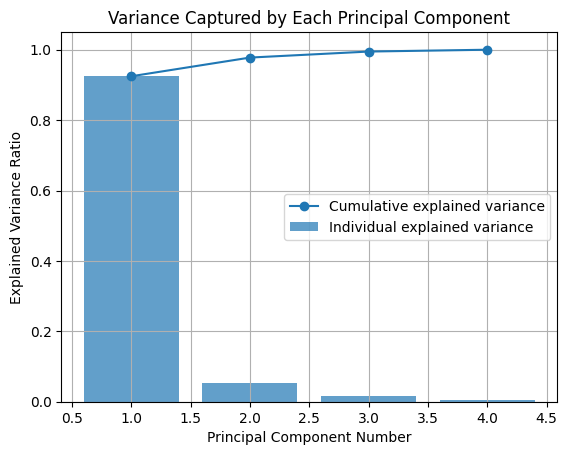

In [29]:

# 44. Train a PCA model and visualize the variance captured by each principal component.

iris_variance = load_iris()
X_variance = iris_variance.data
pca_variance = PCA()
pca_variance.fit(X_variance)
explained_variance_ratio_variance = pca_variance.explained_variance_ratio_

plt.figure()
plt.bar(range(1, len(explained_variance_ratio_variance) + 1), explained_variance_ratio_variance, alpha=0.7, label='Individual explained variance')
plt.plot(range(1, len(explained_variance_ratio_variance) + 1), np.cumsum(explained_variance_ratio_variance), marker='o', linestyle='-', label='Cumulative explained variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# 45. Train a KNN Classifier and perform feature selection before training.

X_fs, y_fs = load_iris(return_X_y=True)
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.3, random_state=42)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=2)
X_train_fs_selected = selector.fit_transform(X_train_fs, y_train_fs)
X_test_fs_selected = selector.transform(X_test_fs)

knn_fs = KNeighborsClassifier(n_neighbors=5)
knn_fs.fit(X_train_fs_selected, y_train_fs)
y_pred_fs = knn_fs.predict(X_test_fs_selected)
accuracy_fs = accuracy_score(y_test_fs, y_pred_fs)
print(f"Accuracy with feature selection (k=2): {accuracy_fs:.4f}")


Accuracy with feature selection (k=2): 1.0000


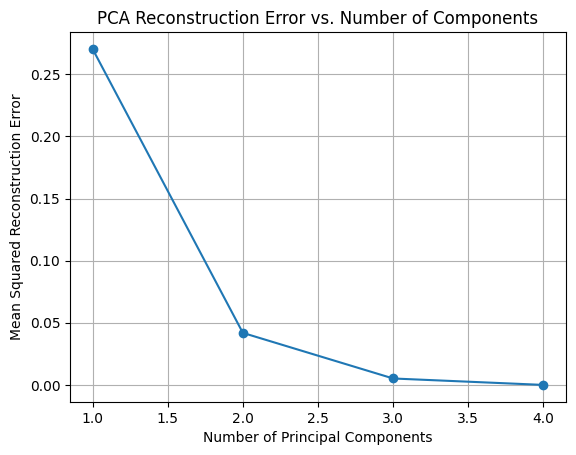

In [32]:
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

iris_recon = load_iris()
X_recon = iris_recon.data
scaler_recon = StandardScaler()
X_recon_scaled = scaler_recon.fit_transform(X_recon)

errors = []
components_range_recon = range(1, X_recon_scaled.shape[1] + 1)
for n_components_recon in components_range_recon:
    pca_recon = PCA(n_components=n_components_recon)
    X_reduced_recon = pca_recon.fit_transform(X_recon_scaled)
    X_reconstructed_recon = pca_recon.inverse_transform(X_reduced_recon)
    mse_recon = mean_squared_error(X_recon_scaled, X_reconstructed_recon)
    errors.append(mse_recon)

plt.figure()
plt.plot(components_range_recon, errors, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.title('PCA Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()


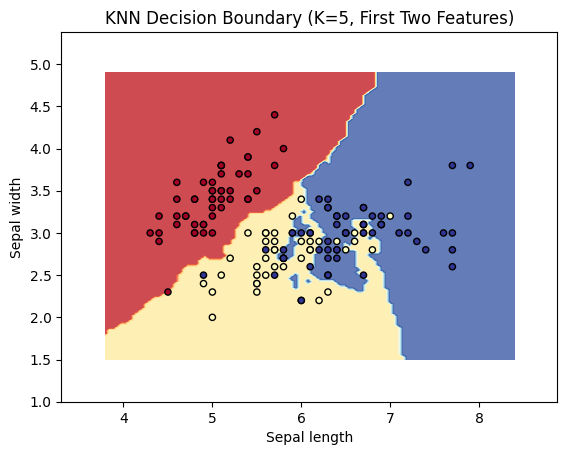

In [33]:
# 47. Train a KNN Classifier and visualize the decision boundary.

X_db_single, y_db_single = iris.data[:, :2], iris.target
h_single = .02
x_min_single, x_max_single = X_db_single[:, 0].min() - 1, X_db_single[:, 0].max() + 1
y_min_single, y_max_single = X_db_single[:, 1].min() - 1, X_db_single[:, 1].max() + 1
xx_single, yy_single = np.meshgrid(np.arange(x_min_single, x_max_single, h_single),
                                     np.arange(y_min_single, y_max_single, h_single))

knn_db_single = KNeighborsClassifier(n_neighbors=5)
knn_db_single.fit(X_db_single, y_db_single)
plt.figure()
DecisionBoundaryDisplay.from_estimator(knn_db_single, X_db_single, cmap=plt.cm.RdYlBu, alpha=0.8, ax=plt.gca(), eps=0.5)
plt.scatter(X_db_single[:, 0], X_db_single[:, 1], c=y_db_single, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.xlim(xx_single.min(), xx_single.max())
plt.ylim(yy_single.min(), yy_single.max())
plt.title('KNN Decision Boundary (K=5, First Two Features)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


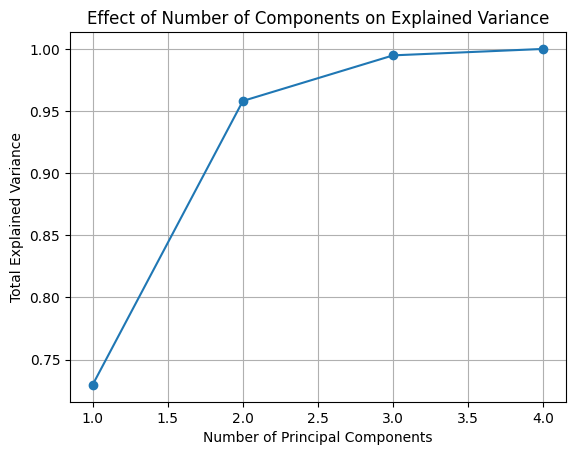

In [34]:
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance.

iris_variance_effect = load_iris()
X_variance_effect = iris_variance_effect.data
scaler_variance_effect = StandardScaler()
X_variance_effect_scaled = scaler_variance_effect.fit_transform(X_variance_effect)

explained_variances = []
components_range_variance = range(1, X_variance_effect_scaled.shape[1] + 1)
for n_components_variance in components_range_variance:
    pca_variance_effect = PCA(n_components=n_components_variance)
    pca_variance_effect.fit(X_variance_effect_scaled)
    explained_variances.append(np.sum(pca_variance_effect.explained_variance_ratio_))

plt.figure()
plt.plot(components_range_variance, explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.title('Effect of Number of Components on Explained Variance')
plt.grid(True)
plt.show()